### In this lab, we will practice for Naive Bayes, Cross Validation, KNN, Entropy and Decision Tree

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sb
from statistics import mean 

We will use the dataset "heart_disease_dataset.csv" to practice Naive Bayes classifier in python. There are 3 columns in the dataset, age, cholesterol and whether or not a patient has heart disease. You will use age and cholesterol to predict heart disease. 

In [5]:
heart_disease = pd.read_csv(filepath_or_buffer='heart_disease_dataset.csv')
heart_disease.head(10)

,age,cholestrol,target
0,63,233,1
1,37,250,1
2,41,204,1
3,56,236,1
4,57,354,1
5,57,192,1
6,56,294,1
7,44,263,1
8,52,199,1
9,57,168,1


In [5]:
# # Load the dataset
# heart_disease = pd.read_csv(filepath_or_buffer='heart_disease_dataset.csv')

# # Get the counts of 0s and 1s in the 'target' column
# target_counts = heart_disease['target'].value_counts()

# # Display the counts
# print(target_counts)

In [6]:
# # Get the counts of 0s and 1s in the 'target' column
# target_counts = heart_disease['target'].value_counts()

# # Create a bar plot
# plt.figure(figsize=(8, 6))
# target_counts.plot(kind='bar', color=['blue', 'orange'])
# plt.title('Distribution of Heart Disease Targets')
# plt.xlabel('Target')
# plt.ylabel('Count')
# plt.xticks(rotation=0)
# plt.show()

In [39]:
# sb.pairplot(heart_disease)

1. Separate the original dataset to training set(75%) and testing set(25%), and train the Naive Bayes model with training data and test with the testing data, print out the accuracy rate. (10)

In [6]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Assuming heart_disease is your DataFrame
x = heart_disease.drop(['target'], axis=1)  # Features (all columns except 'target')
y = heart_disease['target'].values          # Labels (values of the 'target' column)

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Initializing the model
model = GaussianNB()  # model choice: Gaussian Naive Bayes

# Training the model
model.fit(x_train, y_train)

# Making predictions
y_pred = model.predict(x_test)

# Evaluating the model
print("ACC:", metrics.accuracy_score(y_test, y_pred))

# Performing cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, x, y, cv=k_fold)

# Printing cross-validation scores
print("Cross-validation scores for each fold:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())


ACC: 0.631578947368421
Cross-validation scores for each fold: [0.61290323 0.67741935 0.58064516 0.6        0.6        0.7
 0.53333333 0.56666667 0.56666667 0.56666667]
Average cross-validation accuracy: 0.6004301075268816


In [8]:
from sklearn.model_selection import train_test_split

x = heart_disease.drop(['target'], axis=1)  # Features (all columns except 'target')
y = heart_disease['target'].values          # Labels (values of the 'target' column)

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
model= GaussianNB()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print("ACC:", metrics.accuracy_score(y_test, y_pred))

ACC: 0.47368421052631576


2. Instead of seperate training set and testing set, use K-fold cross validation to get the accuracy rate. Print all 10 accuracy score. (k = 10) (10)

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(10) #cross validation for k = 10

print("Average Acc: ", mean(cross_val_score(model, x, y, cv = k_fold)))

Average Acc:  0.43193548387096775


3. Explain whether we need to use Cross Validation to test the model.(10)

4. Use the same dataset. Train a KNN model with the data.(k = 7). Print the ACC score with K-fold cross validation, k = 7.(7)

In [11]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors = 7) 

k_fold = KFold(10) #K-Neighbor classifier

print("Average Acc: ", mean(cross_val_score(knn, x, y, cv = k_fold)))

Average Acc:  0.4286021505376344


5. Next, plot misclassification error vs neighbors, and find the best k and print it's acc score.(10) 

The optimal number of neighbors is 35 Its ACC score is: 0.6039784946236558


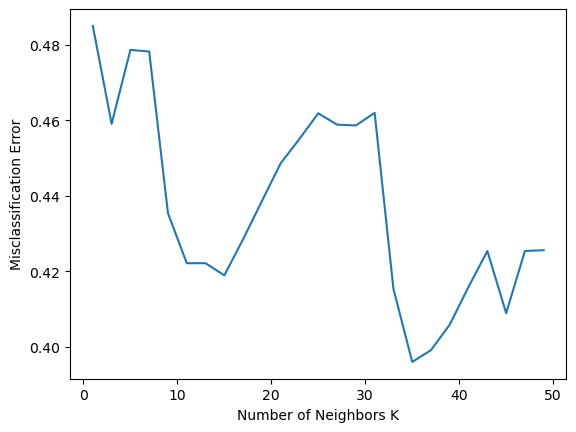

In [12]:
neighbors = list(range(1, 50, 2))
cv_scores = [] # where the scores will stored in. 

for k in neighbors: # k values will change w/ the values stored in 'neighbors'
    
    knn = KNeighborsClassifier(n_neighbors = k) # this is where 'k' is used
    scores = cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy') # cross validation for score
    cv_scores.append(scores.mean()) # storing the mean of 'scores' into 'cv_scores'
    

mse = [1 - x for x in cv_scores]
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k), 
     "Its ACC score is: {}".format(cv_scores[mse.index(min(mse))]))

plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()  

6. Apply decision tree to the data, choose entropy as the criterion, max_depth = 2 (Use training set and testing set.) and print the ACC score.  (10)

In [13]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion = "entropy", max_depth = 2) # applying DTC
DTC.fit(x_train, y_train) # training the model
y_pred = DTC.predict(x_test)

print("Acc: ", metrics.accuracy_score(y_test, y_pred)) # the accuracy between y_test and y_pred

Acc:  0.5131578947368421


7. Print the tree.(10)

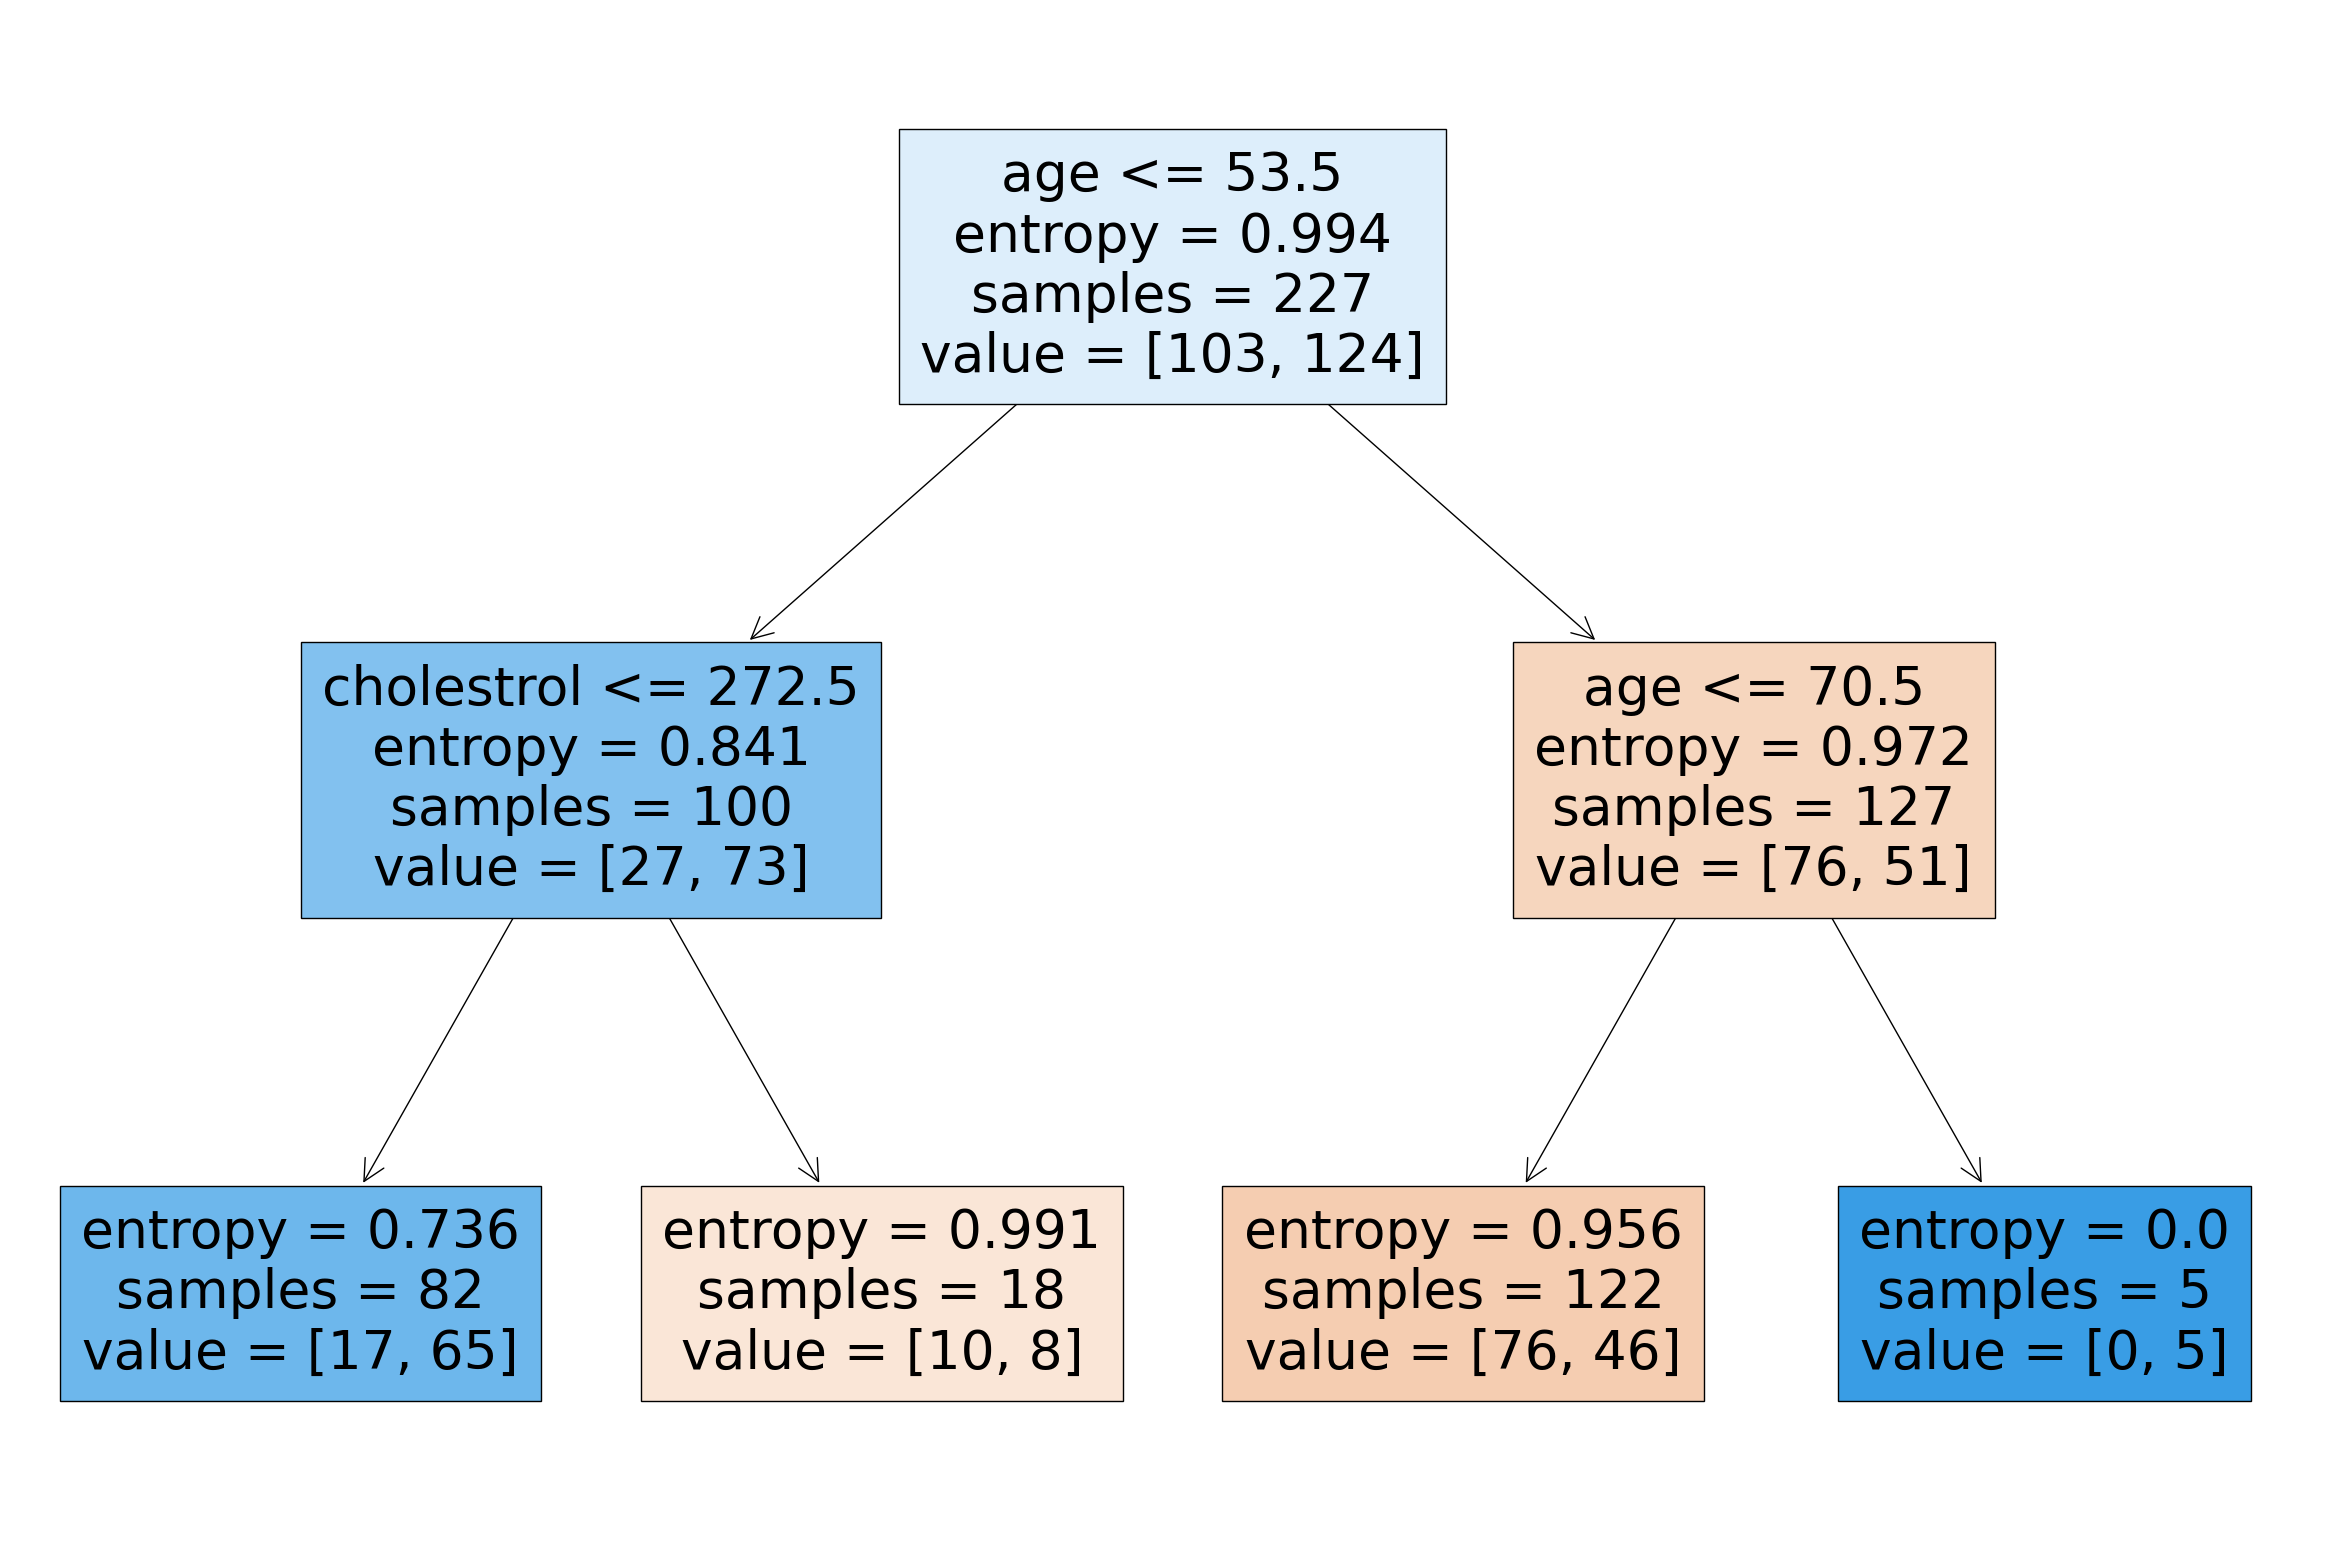

In [14]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (30,20))
tree = plot_tree(DTC,
                feature_names = list(x.columns), 
                filled = True)

8. Calculate the root's entropy and check whether your result is the same as the tree plot(use the equation from class only use numpy to do the calculation).(10)

In [33]:
from scipy.stats import entropy
import math


# manually

# root value value range (the values change with each new run)
p1 = 105/227
p2 = 122/227 

# calculate the entropy
H = -(p1 * math.log2(p1) + p2 * math.log2(p2))

print("H =", H)

######## 

# values from the root node 
values = np.array([105, 122])

# calculate probabilities
probabilities = values/np.sum(values)

base = 2 # log base 2 
H = entropy(probabilities, base = base)

print(f'entropy = {H}')

H = 0.9959505377860031
entropy = 0.9959505377860031


9. Calculate given age <= 62, what is the entropy for cholestrol <= 261, what is the IG, (use the equation from class only use numpy to do the calculation). (10)

In [46]:
import numpy as np

# Define the function to calculate entropy
def entropy(probabilities):
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Data from the provided decision tree
# Splitting by age <= 55.5, we get the following groups:
age_less_equal_55_5 = [105, 122]
age_greater_55_5 = [73, 40]

# Calculate the entropy for these groups
total_samples = 227
p_age_less_equal_55_5 = sum(age_less_equal_55_5) / total_samples
p_age_greater_55_5 = sum(age_greater_55_5) / total_samples

entropy_age_less_equal_55_5 = entropy([x/sum(age_less_equal_55_5) for x in age_less_equal_55_5])
entropy_age_greater_55_5 = entropy([x/sum(age_greater_55_5) for x in age_greater_55_5])

entropy_age = p_age_less_equal_55_5 * entropy_age_less_equal_55_5 + p_age_greater_55_5 * entropy_age_greater_55_5


# Calculate the entropy for cholesterol <= 261 within age <= 62
p_cholesterol_less_equal_261 = age_less_equal_62_cholesterol[0] / total_samples_less_equal_62
p_cholesterol_greater_261 = age_less_equal_62_cholesterol[1] / total_samples_less_equal_62

entropy_cholesterol_less_equal_261 = entropy([21/32, 11/32])
entropy_cholesterol_greater_261 = entropy([71/82, 11/82])

entropy_cholesterol = p_cholesterol_less_equal_261 * entropy_cholesterol_less_equal_261 + p_cholesterol_greater_261 * entropy_cholesterol_greater_261

# Information Gain (IG)
IG = entropy_age - entropy_cholesterol

print("Entropy (cholesterol <= 261) =", entropy_cholesterol)
print("Information Gain (IG) =", IG)


Entropy (cholesterol <= 261) = 0.6696583982936486
Information Gain (IG) = 0.793014193057026


In [28]:
# Values for age <= 62
values_age_62 = np.array([80, 70])
probabilities_age_62 = values_age_62 / np.sum(values_age_62)
H_age_62 = entropy(probabilities_age_62, base=base)
print("Entropy for age <= 62: ", H_age_62)

# Values for cholesterol <= 261 within age <= 62
values_chol_261 = np.array([21, 71])
probabilities_chol_261 = values_chol_261 / np.sum(values_chol_261)
H_chol_261 = entropy(probabilities_chol_261, base=base)
print("Entropy for cholesterol <= 261: ", H_chol_261)




# Values for cholesterol > 261 within age <= 62
values_chol_261_greater = np.array([21, 71])
probabilities_chol_261_greater = values_chol_261_greater / np.sum(values_chol_261_greater)
H_chol_261_greater = entropy(probabilities_chol_261_greater, base=base)
print("Entropy for cholesterol > 261: ", H_chol_261_greater)

# Total samples for age <= 62
total_samples_age_62 = np.sum(values_age_62)

# Weighted entropy for cholesterol split
weighted_entropy_chol = (
    (np.sum(values_chol_261) / total_samples_age_62) * H_chol_261 +
    (np.sum(values_chol_261_greater) / total_samples_age_62) * H_chol_261_greater
)
print("Weighted Entropy for cholesterol split: ", weighted_entropy_chol)





IG = H_age_62 - weighted_entropy_chol
print("Information Gain (IG): ", IG)


Entropy for age <= 62:  0.9967916319816367
Entropy for cholesterol <= 261:  0.7749672673267259
Entropy for cholesterol > 261:  0.9709505944546688
Weighted Entropy for cholesterol split:  0.7989634554452815
Information Gain (IG):  0.1978281765363552


10. Find the best max_depth in Decision Tree for entopy and Gini. If it's different, explain why.(10)

In [47]:
ACCs_Gini = []

for max_depth in range(1, 11):
    DTC_gini = DecisionTreeClassifier(max_depth = max_depth)
    DTC_gini.fit(x_train, y_train)
    
    y_pred = DTC_gini.predict(x_test)
    ACCs_Gini.append(metrics.accuracy_score(y_test, y_pred))
    
print("ACCs: ", ACCs_Gini)

ACCs:  [0.4868421052631579, 0.5, 0.47368421052631576, 0.47368421052631576, 0.4473684210526316, 0.4868421052631579, 0.5131578947368421, 0.5263157894736842, 0.4342105263157895, 0.4605263157894737]
